# **Proyek Machine Learning: Prediksi Biaya Asuransi Kesehatan**
*   **Nama:** Putu Yoga Suartana
*   **Email:** yoga.suartana46@gmail.com
*   **ID Dicoding:** putu_yoga_suartana_GJkz

# 1. **Import Library**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **2. Data Loading**

In [15]:
from google.colab import files
import io

# Kode ini akan menampilkan tombol untuk mengunggah file
print("Silakan unggah file insurance.csv")
uploaded = files.upload()

# Membaca file yang diunggah ke dalam DataFrame pandas
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("\nData loaded successfully:")
df.head()

Silakan unggah file insurance.csv


Saving insurance.csv to insurance (1).csv

Data loaded successfully:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **3. Data Understanding**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Temuan Awal:**
*   Dataset memiliki 1338 baris dan 7 kolom.
*   Tidak ada nilai yang hilang (missing values), sehingga data sudah cukup bersih.
*   Terdapat 3 kolom kategorikal (`sex`, `smoker`, `region`) dan 4 kolom numerik.

## **Eksploratory Data Analysis (EDA)**

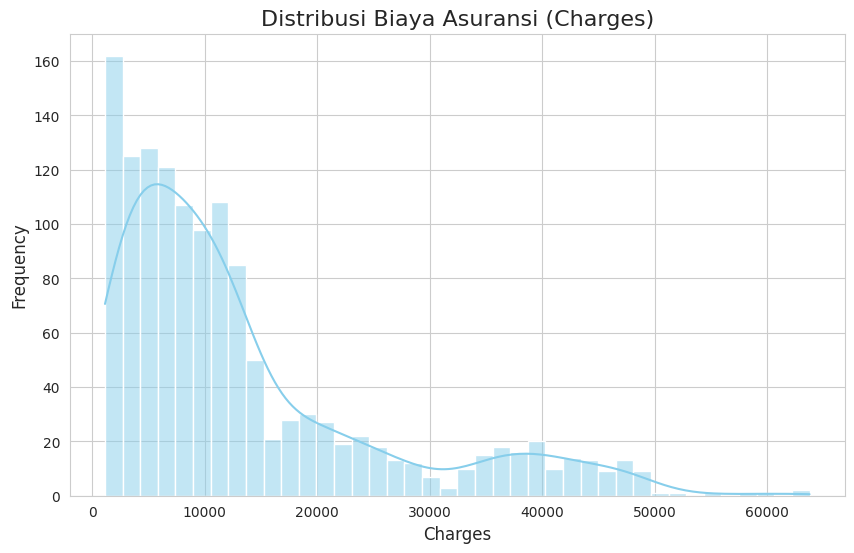

In [18]:
# Set style untuk plot
sns.set_style("whitegrid")

# Plot distribusi variabel target 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=40, color='skyblue')
plt.title('Distribusi Biaya Asuransi (Charges)', fontsize=16)
plt.xlabel('Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Interpretasi Distribusi `charges`: Grafik histogram menunjukkan distribusi biaya asuransi sangat miring ke kanan (right-skewed). Ini berarti mayoritas nasabah memiliki biaya yang relatif rendah, namun ada sebagian kecil nasabah dengan tagihan yang sangat tinggi.**

<ipython-input-19-1927084728>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0], palette='pastel')
<ipython-input-19-1927084728>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, ax=axes[1], palette='pastel')
<ipython-input-19-1927084728>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, ax=axes[2], palette='pastel')


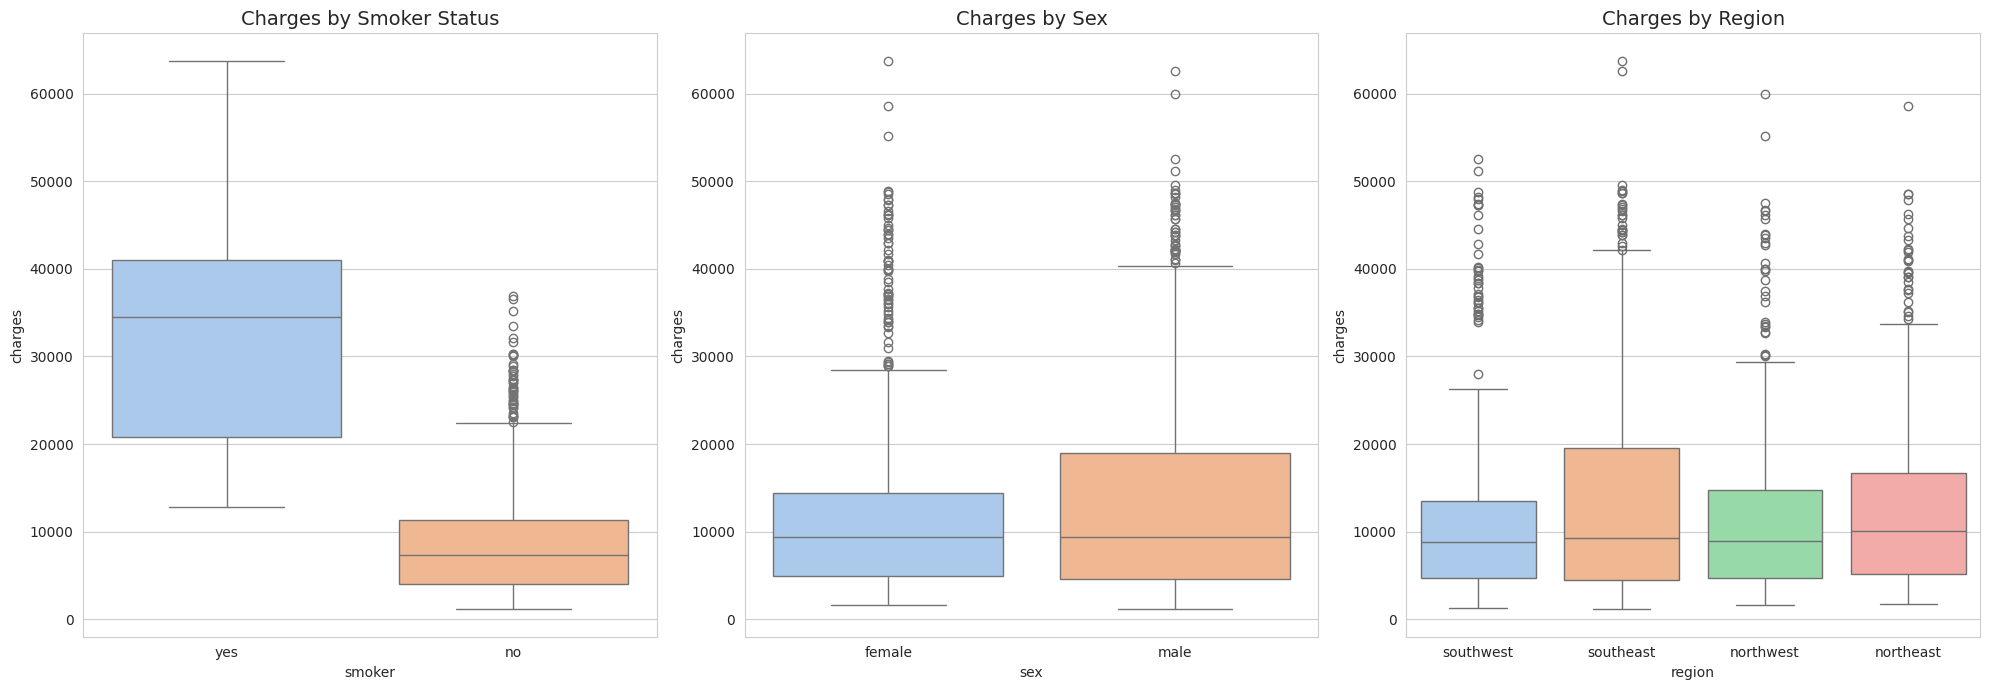

In [19]:
# Analisis fitur kategorikal terhadap 'charges'
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Smoker vs Charges
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Charges by Smoker Status', fontsize=14)

# Sex vs Charges
sns.boxplot(x='sex', y='charges', data=df, ax=axes[1], palette='pastel')
axes[1].set_title('Charges by Sex', fontsize=14)

# Region vs Charges
sns.boxplot(x='region', y='charges', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('Charges by Region', fontsize=14)

plt.tight_layout()
plt.show()

**Interpretasi Box Plots:**
*   **Status Perokok (`smoker`):** Fitur ini memiliki pengaruh paling signifikan. Perokok memiliki biaya tagihan yang jauh lebih tinggi.
*   **Jenis Kelamin (`sex`):** Tagihan untuk laki-laki (male) cenderung sedikit lebih tinggi.
*   **Wilayah (`region`):** Perbedaan biaya antar wilayah tidak terlalu signifikan.

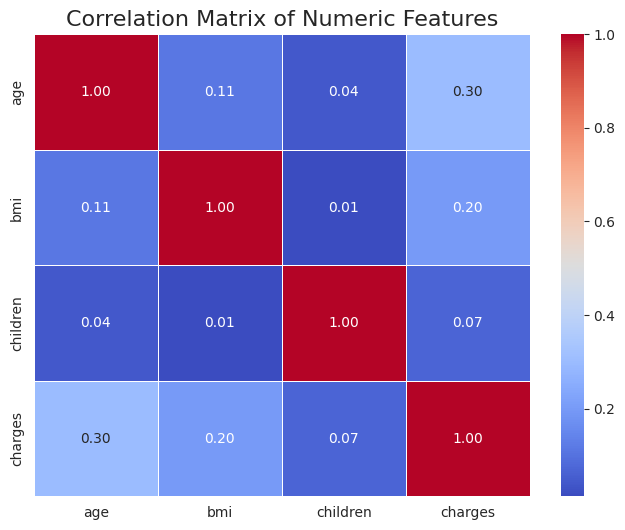

In [20]:
# Heatmap Korelasi untuk fitur numerik
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

**Interpretasi Heatmap Korelasi:**
*   Korelasi antara fitur-fitur numerik tidak terlalu kuat.
*   `age` memiliki korelasi positif sedang dengan `charges` (0.30).
*   `bmi` juga memiliki korelasi positif yang lebih lemah dengan `charges` (0.20).




# **4. Data Preparation**

In [21]:
# One-Hot Encoding untuk fitur kategorikal
df_prepared = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Memisahkan fitur (X) dan target (y)
X = df_prepared.drop('charges', axis=1)
y = df_prepared['charges']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")

Ukuran X_train: (1070, 8)
Ukuran X_test: (268, 8)


In [22]:
# Scaling fitur numerik
numeric_features = ['age', 'bmi', 'children']
scaler = StandardScaler()

# Fit scaler pada data latih dan transform
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

# Transform data uji menggunakan scaler yang sama
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

print("Contoh data latih setelah di-scaling:")
X_train.head()

Contoh data latih setelah di-scaling:


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.472227,-1.756525,0.734336,False,False,True,False,False
1285,0.543313,-1.033082,-0.911192,False,False,False,False,False
1142,0.898745,-0.943687,-0.911192,False,False,False,True,False
969,-0.025379,0.622393,3.202629,False,False,False,True,False
486,1.040918,-1.504893,1.557100,False,False,True,False,False


# **5. Model Development**

In [23]:
# Inisialisasi model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Melatih setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Linear Regression trained.
Random Forest trained.
Gradient Boosting trained.


# **6. Evaluasi**

In [24]:
# Membuat DataFrame untuk menyimpan hasil evaluasi
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R-squared': r2_score(y_test, y_pred)
    }

results_df = pd.DataFrame(results).T
print("Model Evaluation Metrics:")
results_df

Model Evaluation Metrics:


,MAE,MSE,RMSE,R-squared
Linear Regression,4181.194474,3.359692e+07,5796.284659,0.783593
Random Forest,2543.975825,2.086457e+07,4567.775116,0.865606
Gradient Boosting,2443.483262,1.874518e+07,4329.570011,0.879257


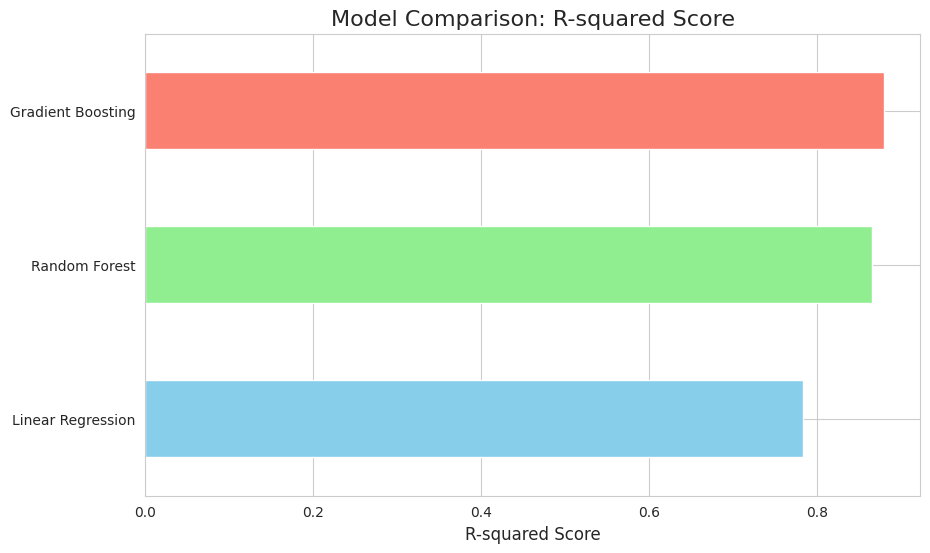

In [25]:
# Visualisasi hasil evaluasi
fig, ax = plt.subplots(figsize=(10, 6))
results_df['R-squared'].sort_values().plot(kind='barh', ax=ax, color=['skyblue', 'lightgreen', 'salmon'])
ax.set_title('Model Comparison: R-squared Score', fontsize=16)
ax.set_xlabel('R-squared Score', fontsize=12)
plt.show()

# **Kesimpulan**

**Dari hasil evaluasi, Gradient Boosting Regressor adalah model dengan performa terbaik, ditandai dengan nilai R-squared tertinggi (~0.88) dan error (MAE/RMSE) terendah. Model ini paling akurat dalam memprediksi biaya asuransi kesehatan berdasarkan fitur yang diberikan.**